<a href="https://colab.research.google.com/github/JasonUen/cartopy/blob/master/AI_Foundry_2024_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine Learning**

## Overview
Machine Learning (ML) is a field of study that focuses on developing algorithms and models that allow computers to learn and make predictions or decisions without being explicitly programmed.

## *Import Libraries*

First, let's import the necessary libraries:

*   NumPy for numerical operations
*   scikit-learn's `datasets` module to load the iris dataset
*   scikit-learn's `train_test_split` to split the data into training and testing sets
*   scikit-learn's `KNeighborsClassifier` as the classification algorithm
*   scikit-learn's `accuracy_score` to calculate the accuracy of the model
* `pandas` library to convert the dataset to a pandas DataFrame
* `seaborn` and `matplotlib.pyplot` for visualization

In [ ]:
%pip install scikit-learn
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## *The Dataset*

The [Iris dataset](https://www.kaggle.com/datasets/uciml/iris) is a popular dataset in the field of machine learning and is often used for classification tasks. It consists of measurements of iris flowers belonging to three different species: setosa, versicolor, and virginica. The measurements include the sepal length, sepal width, petal length, and petal width of the flowers. The goal is to predict the species of the iris flowers based on these measurements. The dataset is well-structured and balanced, making it suitable for evaluating and comparing different classification algorithms.

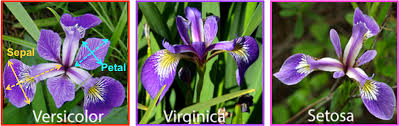

Source: [RPubs](https://rpubs.com/vidhividhi/irisdataeda)

Load the iris dataset using `datasets.load_iris()` and split the data into features (`X`) and labels (`y`).

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()

### Visualize the Dataset

Create a pandas DataFrame (`df`) using the `pd.DataFrame` constructor: pass in the data (`iris.data`) and set the column names as the feature names (`iris.feature_names`) and add a column called "target" and set it equal to `iris.target`.

In [ ]:
# Convert the dataset to a pandas DataFrame for visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

Print the DataFrame (df) to display the dataset as a table using the print function.

In [ ]:
# Display first 5 rows of the dataset as a table
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


Add count plots for each species using `sns.countplot`: set the `x` parameter to `'target_names'` to represent the species, and the `data` parameter to `df` to use the DataFrame for plotting.
Finally, add labels and a title to the count plot using `plt.xlabel`, `plt.ylabel`, and `plt.titl`e.

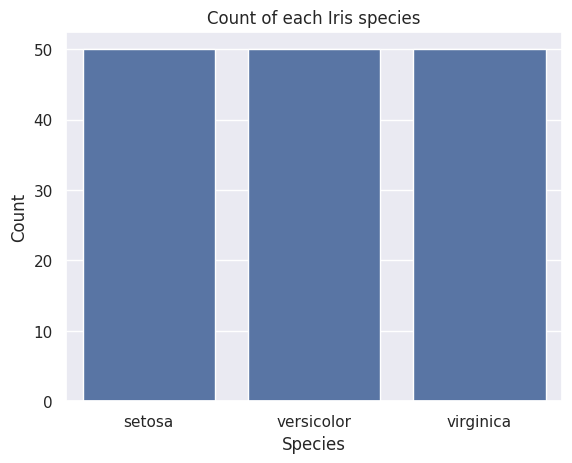

In [ ]:
# Plot the count of each species
sns.set(style="darkgrid")
sns.countplot(x='target_names', data=df)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of each Iris species')
plt.show()

We use `sns.pairplot` to plot the scatter matrix of the DataFrame (`df`). The `hue="target"` parameter ensures that each species is represented by a different color. We also call `plt.show()` to display the scatter matrix plot.

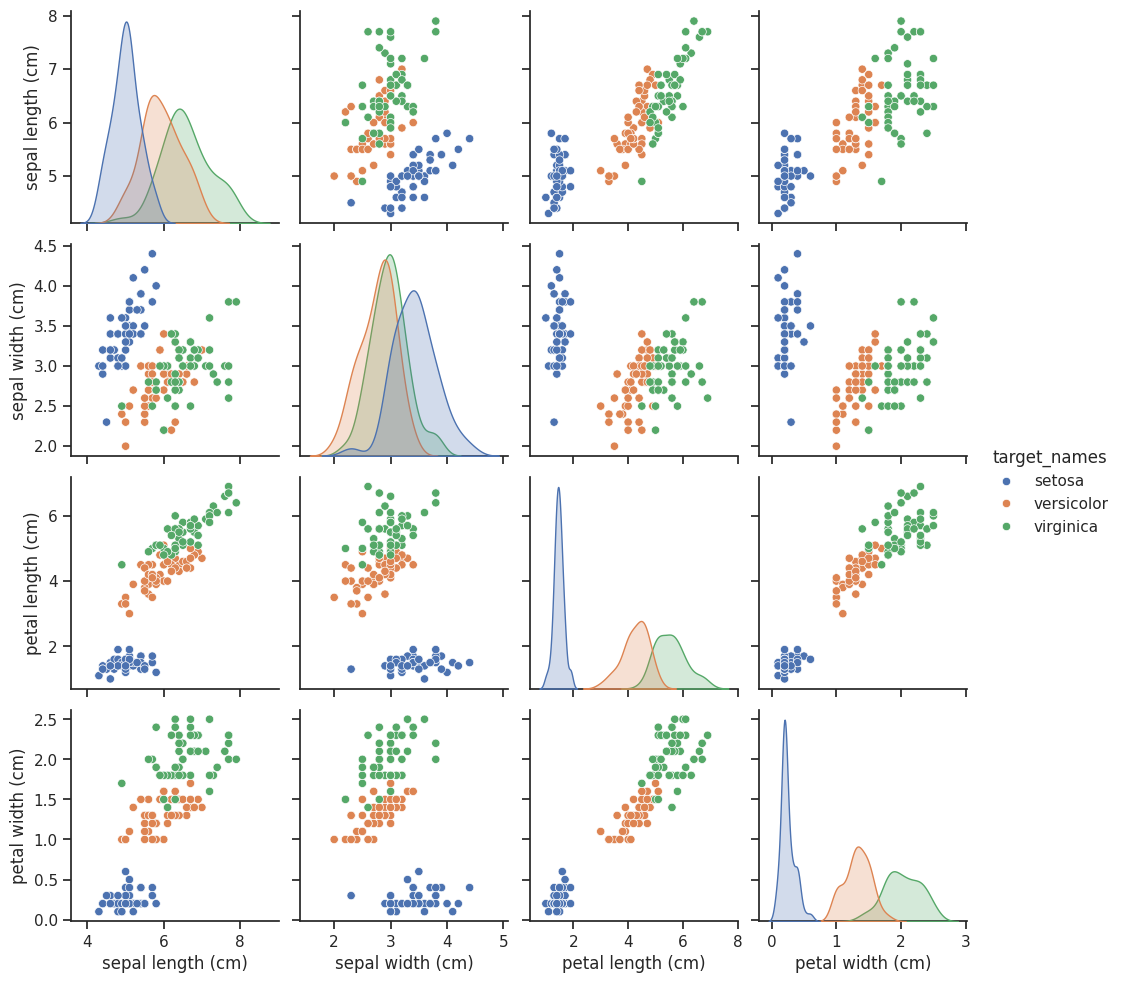

In [ ]:
# Plot the scatter matrix
sns.set(style="ticks")
sns.pairplot(df.drop(columns=["target"]), hue="target_names") # plots multiple pairwise bivariate distributions in the dataset
plt.show()

## *Training and Testing Datasets*

In [ ]:
# Split the data into features and labels
X = iris.data
y = iris.target

Split the data into training and testing sets using `train_test_split`, with a test size of 20% and a random seed of 27 for reproducibility.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [ ]:
# Visualize the shape of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (120, 4)
Shape of y_train: (120,)
Shape of X_test: (30, 4)
Shape of y_test: (30,)


## *Classification Model*

### Train the Model

K-Nearest Neighbors (KNN) is a simple yet effective classification algorithm. In KNN, the classification of a new data point is determined by the majority vote of its K nearest neighbors in the feature space. KNN does not make any assumptions about the underlying data distribution and can handle both linear and non-linear relationships. It is a non-parametric algorithm, meaning it does not require explicit model training. KNN's simplicity and flexibility make it a popular choice for various classification tasks.

**The KNN Algorithm**
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data

  * Calculate the distance between the query example and the current example from the data.

  * Add the distance and the index of the example to an ordered collection

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances

5. Pick the first K entries from the sorted collection

6. Get the labels of the selected K entries

7. If regression, return the mean of the K labels

8. If classification, return the mode of the K labels

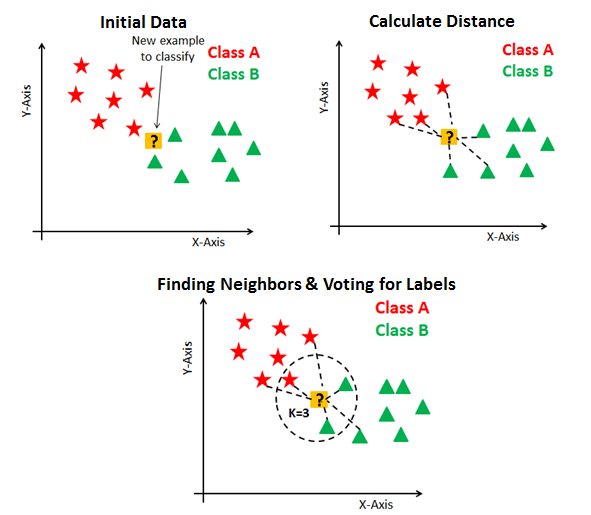

Image Source: [Vatsal Parsaniya](https://github.com/Vatsalparsaniya)

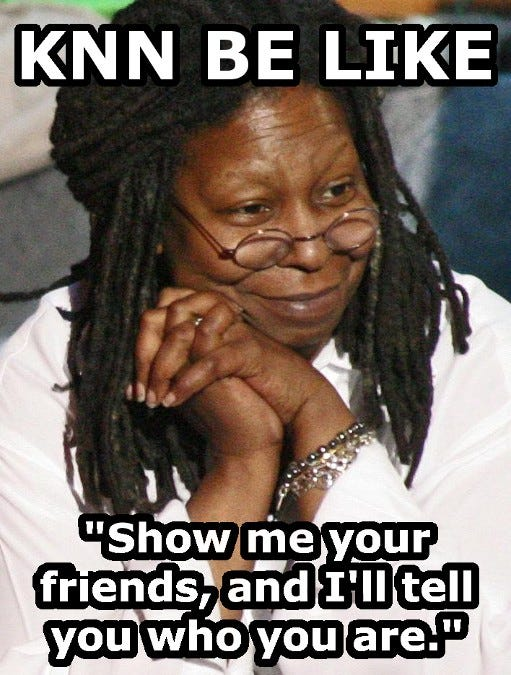

Source: [Medium](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

Create a K-nearest neighbors (KNN) classifier with `KNeighborsClassifier(n_neighbors=3)` and train it using the training data (`X_train` and `y_train`) with the `fit` method.

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Make Predictions and Evaluate the Model

Make predictions on the test data (`X_test`) using the `predict` method and calculate the accuracy of the model using `accuracy_score`.

In [ ]:
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

After making predictions on the testing data, create a new DataFrame (`df_pred`) using `pd.DataFrame`: pass in a dictionary with keys `'Actual'` and `'Predicted'` and corresponding values `y_test` and `y_pred`, respectively.

Print the DataFrame (`df_pred`) to display the actual labels and predicted labels side by side.

In [ ]:
# Visualize the predicted labels and actual labels
df_pred_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
print(df_pred_knn)

    Actual  Predicted
0        2          2
1        0          0
2        2          2
3        2          2
4        1          1
5        1          1
6        1          1
7        2          2
8        1          1
9        0          0
10       1          1
11       2          2
12       0          0
13       1          1
14       1          1
15       1          1
16       0          0
17       2          2
18       2          2
19       2          2
20       1          1
21       0          0
22       1          1
23       0          0
24       2          2
25       2          1
26       1          1
27       0          0
28       2          2
29       2          2


In [ ]:
# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}")

Accuracy: 0.9666666666666667


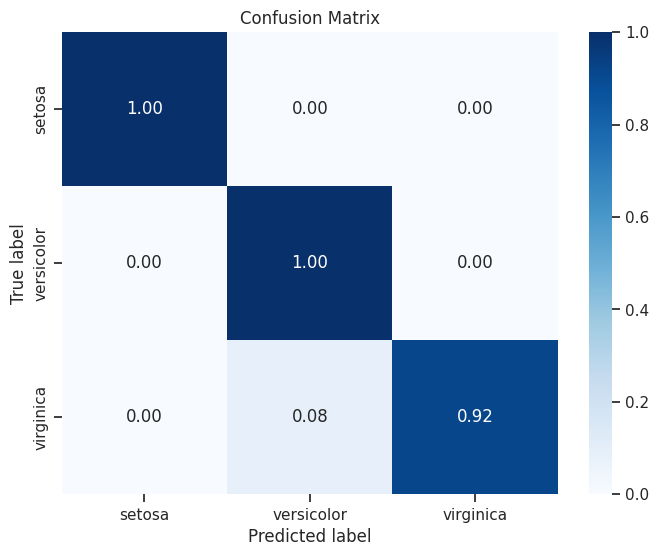

In [ ]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot the confusion matrix for KNN
plot_confusion_matrix(y_test, y_pred_knn, classes=['setosa', 'versicolor', 'virginica'])

Demonstrate the usage of the trained model by predicting the class of a new iris sample (`new_sample`). You can replace the values in `new_sample` with your own measurements to see the predicted class.

In [ ]:
# Example usage:
# Predict the class of a new iris sample
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # replace with your own measurements
predicted_class = knn.predict(new_sample)
print(f"Predicted class: {iris.target_names[predicted_class[0]]}")

Predicted class: setosa


## *Your turn!*

### Support Vector Machines (SVM)
Support Vector Machines (SVM) is a powerful and versatile classification algorithm. SVM aims to find an optimal hyperplane that separates different classes in a high-dimensional feature space. It achieves this by maximizing the margin between the hyperplane and the nearest data points of different classes. SVM can handle both linearly separable and non-linearly separable datasets by using different kernel functions such as linear, polynomial, or radial basis function (RBF). SVM is known for its ability to handle high-dimensional data and its robustness against overfitting.

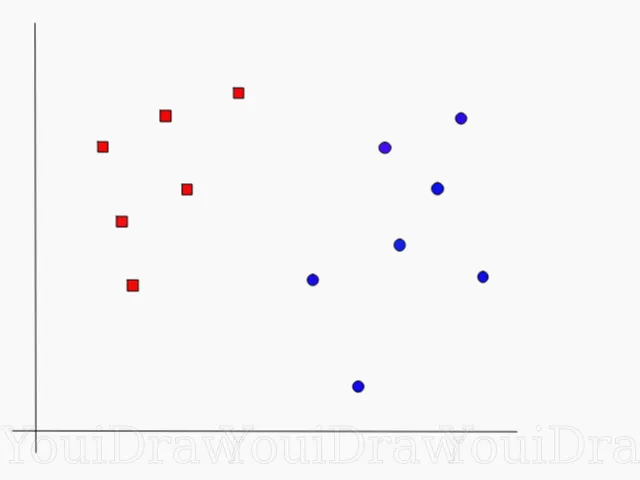 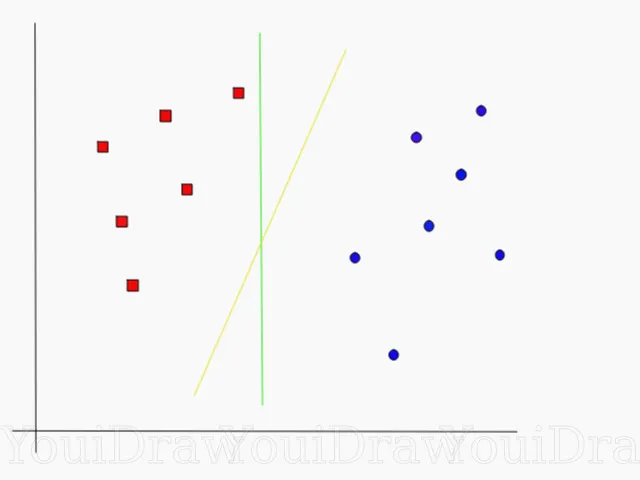 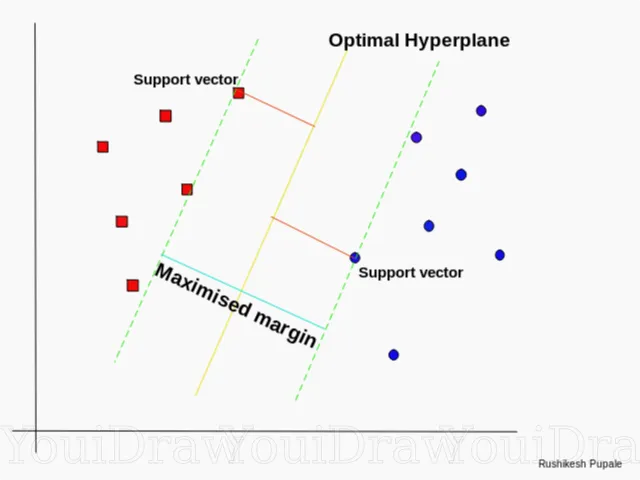

Source: [Medium](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)

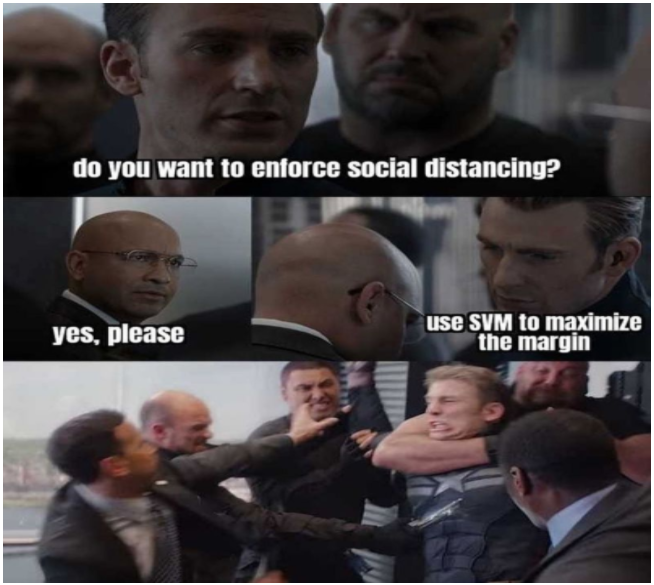

Image Source: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/10/the-mathematics-behind-svm/)

2. The following code creates a Suport Vector Machine (SVM) classifier. Finish the code by using the `fit` and `predict` methods. Try to visualize the new predicted labels and calculate accuracy of the new model.

```
# Import necessary libraries
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) classifier
svm = SVC()
```



In [ ]:
# Import necessary libraries
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) classifier
svm = SVC(C=1.0)

In [ ]:
#@title Solution

# Import necessary libraries
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) classifier
svm = SVC()

# Train the SVM classifier using the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data using SVM classifier
y_pred_svm = svm.predict(X_test)

# Visualize the predicted labels and actual labels for SVM classifier
df_pred_svm = pd.DataFrame({'Actual': y_test, 'Predicted (SVM)': y_pred_svm})
print("\nSupport Vector Machine (SVM) Classifier:")
print(df_pred_svm)

# Calculate the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm}")


Support Vector Machine (SVM) Classifier:
    Actual  Predicted (SVM)
0        2                2
1        0                0
2        2                2
3        2                2
4        1                1
5        1                1
6        1                1
7        2                2
8        1                2
9        0                0
10       1                1
11       2                2
12       0                0
13       1                1
14       1                1
15       1                1
16       0                0
17       2                2
18       2                2
19       2                2
20       1                1
21       0                0
22       1                1
23       0                0
24       2                2
25       2                1
26       1                1
27       0                0
28       2                2
29       2                2
Accuracy (SVM): 0.9333333333333333


### Artificial Neural Networks (ANN)
Artificial Neural Networks (ANN) are computational models inspired by the structure and function of the human brain. ANN consists of interconnected artificial neurons organized in layers. Each neuron applies a transformation to the inputs it receives and passes the result to the neurons in the next layer. Through a process called training, ANN learns to adjust the weights and biases of the neurons to minimize the difference between predicted outputs and true outputs. ANN can learn complex patterns and relationships in the data, making it suitable for a wide range of tasks, including classification, regression, and image recognition. ANN's ability to learn from large amounts of data and its flexibility in modeling complex relationships are its key advantages.

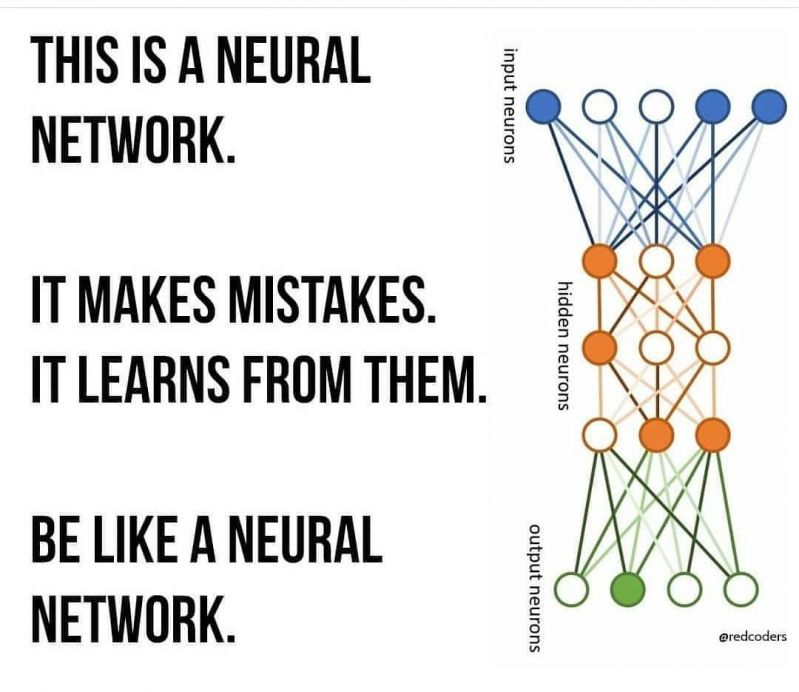

3. The following code creates an Artificial Neural Network (ANN) classifier. Finish the code by using the `fit` and `predict` methods. Try to visualize the new predicted labels and calculate accuracy of the new model.

```
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# Create an Artificial Neural Network (ANN) classifier
ann = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000)
```



In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# Create an Artificial Neural Network (ANN) classifier
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100)

In [ ]:
#@title Solution

# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# Create an Artificial Neural Network (ANN) classifier
ann = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, learning_rate_init=0.1)

# Train the ANN classifier using the training data
ann.fit(X_train, y_train)

# Make predictions on the testing data using ANN classifier
y_pred_ann = ann.predict(X_test)

# Visualize the predicted labels and actual labels for ANN classifier
df_pred_ann = pd.DataFrame({'Actual': y_test, 'Predicted (ANN)': y_pred_ann})
print("\nArtificial Neural Network (ANN) Classifier:")
print(df_pred_ann)

# Calculate the accuracy of the ANN classifier
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy (ANN): {accuracy_ann}")


Artificial Neural Network (ANN) Classifier:
    Actual  Predicted (ANN)
0        2                2
1        0                0
2        2                2
3        2                2
4        1                1
5        1                1
6        1                1
7        2                2
8        1                1
9        0                0
10       1                1
11       2                1
12       0                0
13       1                1
14       1                1
15       1                1
16       0                0
17       2                2
18       2                2
19       2                2
20       1                1
21       0                0
22       1                1
23       0                0
24       2                2
25       2                2
26       1                1
27       0                0
28       2                1
29       2                2
Accuracy (ANN): 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


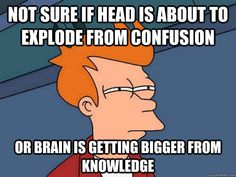

Vist the website https://ml-playground.com/ to visualize some of these concepts.

## *Fine Tunning Parameters*

### SVM

In [ ]:
# Define parameters for tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}


In [ ]:
# Perform grid search cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
# Get the best parameters
best_parameters = grid_search.best_params_
print("Best parameters found: ", best_parameters)

Best parameters found:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Create a list of the mean cross-validation scores for each parameter combination
mean_scores = grid_search.cv_results_['mean_test_score']

In [ ]:
# Print best parameters and accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy on validation set: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters found:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy on validation set: 96.67%


In [ ]:
# Evaluate model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

Accuracy on test set: 93.33%


**SVM with 5 different partitions**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define parameters for tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Create SVM model
svm_model = SVC()

# Use StratifiedKFold for different data partitions
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store results
best_params_list = []
test_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform grid search cross-validation
    grid_search = GridSearchCV(svm_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print best parameters and accuracy for each split
    best_params = grid_search.best_params_
    best_params_list.append(best_params)
    print(f"Best parameters for split {len(best_params_list)}: {best_params}")
    print(f"Best accuracy on validation set for split {len(best_params_list)}: {grid_search.best_score_ * 100:.2f}%")

    # Evaluate model on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    print(f"Accuracy on test set for split {len(best_params_list)}: {accuracy * 100:.2f}%")

# Calculate and print the average accuracy across all splits
average_accuracy = np.mean(test_accuracies)
print(f"\nAverage accuracy on test set across all splits: {average_accuracy * 100:.2f}%")

Best parameters for split 1: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best accuracy on validation set for split 1: 98.33%
Accuracy on test set for split 1: 100.00%
Best parameters for split 2: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best accuracy on validation set for split 2: 98.33%
Accuracy on test set for split 2: 100.00%
Best parameters for split 3: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best accuracy on validation set for split 3: 100.00%
Accuracy on test set for split 3: 93.33%
Best parameters for split 4: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best accuracy on validation set for split 4: 98.33%
Accuracy on test set for split 4: 100.00%
Best parameters for split 5: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy on validation set for split 5: 96.67%
Accuracy on test set for split 5: 93.33%

Average accuracy on test set across all splits: 97.33%


### KNN

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define parameters for tuning
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Create KNN model
knn_model = KNeighborsClassifier()

# Use StratifiedKFold for different data partitions
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store results
best_params_list = []
test_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform grid search cross-validation
    grid_search = GridSearchCV(knn_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print best parameters and accuracy for each split
    best_params = grid_search.best_params_
    best_params_list.append(best_params)
    print(f"Best parameters for split {len(best_params_list)}: {best_params}")
    print(f"Best accuracy on validation set for split {len(best_params_list)}: {grid_search.best_score_ * 100:.2f}%")

    # Evaluate model on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    print(f"Accuracy on test set for split {len(best_params_list)}: {accuracy * 100:.2f}%")

# Calculate and print the average accuracy across all splits
average_accuracy = np.mean(test_accuracies)
print(f"\nAverage accuracy on test set across all splits: {average_accuracy * 100:.2f}%")

Best parameters for split 1: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy on validation set for split 1: 97.50%
Accuracy on test set for split 1: 96.67%
Best parameters for split 2: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy on validation set for split 2: 97.50%
Accuracy on test set for split 2: 96.67%
Best parameters for split 3: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best accuracy on validation set for split 3: 99.17%
Accuracy on test set for split 3: 86.67%
Best parameters for split 4: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best accuracy on validation set for split 4: 97.50%
Accuracy on test set for split 4: 100.00%
Best parameters for split 5: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy on validation set for split 5: 97.50%
Accuracy on test set for split 5: 93.33%

Average accuracy on test set across all splits: 94.67%


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define parameters for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Create KNN model
knn_model = KNeighborsClassifier()

# Use StratifiedKFold for different data partitions
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store results
best_params_list = []
test_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform grid search cross-validation
    grid_search = GridSearchCV(knn_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print best parameters and accuracy for each split
    best_params = grid_search.best_params_
    best_params_list.append(best_params)
    print(f"Best parameters for split {len(best_params_list)}: {best_params}")
    print(f"Best accuracy on validation set for split {len(best_params_list)}: {grid_search.best_score_ * 100:.2f}%")

    # Evaluate model on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    print(f"Accuracy on test set for split {len(best_params_list)}: {accuracy * 100:.2f}%")

# Calculate and print the average accuracy across all splits
average_accuracy = np.mean(test_accuracies)
print(f"\nAverage accuracy on test set across all splits: {average_accuracy * 100:.2f}%")

Best parameters for split 1: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy on validation set for split 1: 97.50%
Accuracy on test set for split 1: 96.67%
Best parameters for split 2: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy on validation set for split 2: 97.50%
Accuracy on test set for split 2: 96.67%
Best parameters for split 3: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best accuracy on validation set for split 3: 99.17%
Accuracy on test set for split 3: 90.00%
Best parameters for split 4: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best accuracy on validation set for split 4: 97.50%
Accuracy on test set for split 4: 100.00%
Best parameters for split 5: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy on validation set for split 5: 97.50%
Accuracy on test set for split 5: 93.33%

Average accuracy on test set across all splits: 95.33%
